# JOB-A-THON - September 2021

## Supplement-Sales-Prediction

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Setting Working Directory

In [2]:
Location = r'C:\Users\Bharti Lenday\Downloads'

### Loading the Train Data and Test Data

In [3]:
Train = pd.read_csv(Location + '/' + 'TRAIN.csv')
Test = pd.read_csv( Location + '/' + 'TEST_FINAL.csv')

### Data Inspection

In [4]:
Train.head(3)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20


In [5]:
Test.head(3)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No


In [6]:
# Shape of the dataset
print('Shape of the Train data:',Train.shape)
print('Shape of the Test data:',Test.shape)

Shape of the Train data: (188340, 10)
Shape of the Test data: (22265, 8)



* **The Train data contains 188340 rows and 10 columns including the target column.**
* **The Test data contains 22265 rows and 8 columns.**

In [7]:
# Checking the data types of each column of this dataset.
print('Data type of Train data :\n' , Train.dtypes,'\n\n')
print('Data type of Test data :\n', Test.dtypes)

Data type of Train data :
 ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object 


Data type of Test data :
 ID               object
Store_id          int64
Store_Type       object
Location_Type    object
Region_Code      object
Date             object
Holiday           int64
Discount         object
dtype: object


In [8]:
# Checking the columns of both the data.
print('Columns of Train data :\n' , Train.columns,'\n\n\n')
print('Columns of Test data :\n', Test.columns)

Columns of Train data :
 Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object') 



Columns of Test data :
 Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object')


**Test data does not include the target variable i.e. 'Sales' and the '#Order' Column.**

In [9]:
# Information of both the data
print( Train.info(),'\n\n')
print( Test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64

In [10]:
# Describe both data
Train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [11]:
Test.describe()

,Store_id,Holiday
count,22265.000000,22265.000000
mean,183.000000,0.032787
std,105.368395,0.178082
min,1.000000,0.000000
25%,92.000000,0.000000
50%,183.000000,0.000000
75%,274.000000,0.000000
max,365.000000,1.000000


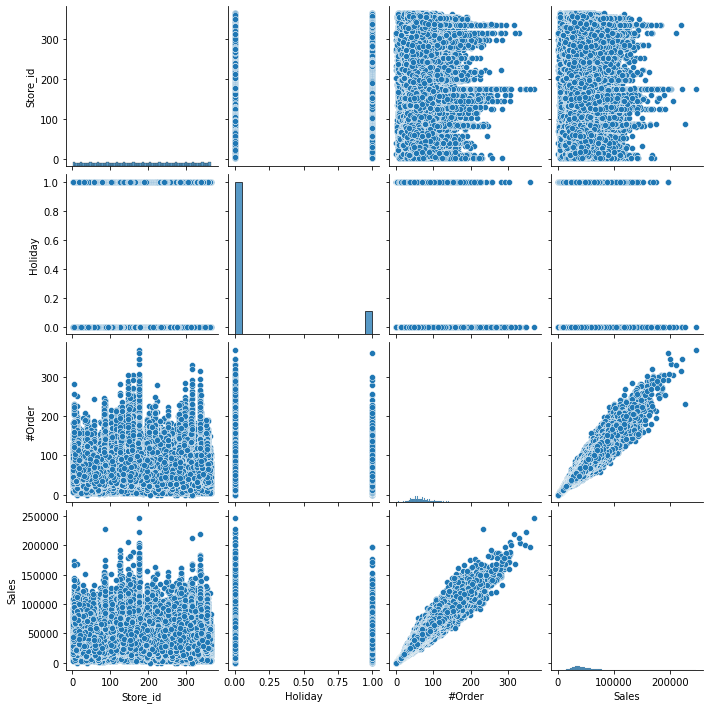

In [12]:
# Correlation Analysis in Train data
sns.pairplot(Train)
plt.show()


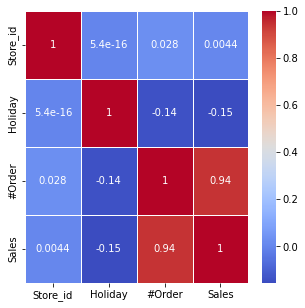

In [13]:
# Visualizing the same thing as above in different way
plt.figure(figsize=(5,5))    
ax = sns.heatmap(Train.corr(), cmap = "coolwarm", annot=True, linewidth=1)
bottom, top = ax.get_ylim()


[]

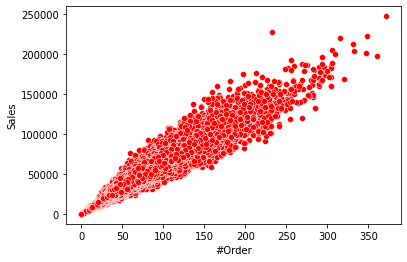

In [14]:
# Relation between '#Order' and 'Sales'
ax = sns.scatterplot(x="#Order", y="Sales", data=Train,color='r')
plt.plot()

**There is strong positive correlation between '#orders' and 'sales' (target variable). Thus, '#Order' can be dropped from the Train dataset as also, it is not available in the Test data.**

In [15]:
# Number of unique values in each columns and unique values in each columns.

for i in Train.columns:
    print("Unique value of = {} [[{}]]\n{}\n".format(i, len(Train[i].unique()), Train[i].unique()))

Unique value of = ID [[188340]]
['T1000001' 'T1000002' 'T1000003' ... 'T1188338' 'T1188339' 'T1188340']

Unique value of = Store_id [[365]]
[  1 253 252 251 250 249 248 247 246 254 245  11 243 242 241 240 239 238
 237 244 236 255 256 273 272 271 270 269 268   9 267  10 266 264 263 262
 261 260 259 258 257 265 235 234 233 211 210 209 208 207  14 206 205 212
 204 202 201 200 199 198 197 196 195 203 213 214 215 232  12 231 230 229
 228 227 226 225 224 223 222 221 220 219  13 218 217 216 274  15 275 277
 335 334 333 332 331 330   4 329 336 328 326 325 324 323 322 321 320 319
 327 318 337 339 355 354   2 353 352 351 350 349 338 348 346 345 344 343
 342   3 341 340 347 317   5 316 293   7 292 291 290 289 288 287 294 286
 284 283 282 281   8 280 279 278 285 295 296 297 315 314 313 312 311 310
 309 308 307 306 305   6 304 303 302 301 300 299 298 276 194 193 192  87
  86  85  24  84  83  82  81  88  80  78  77  76  75  74  73  72  25  79
  71  89  91 108 107 106 105 104 103 102 101  90 100  98 

### Data Visualization

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64


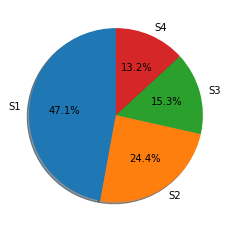

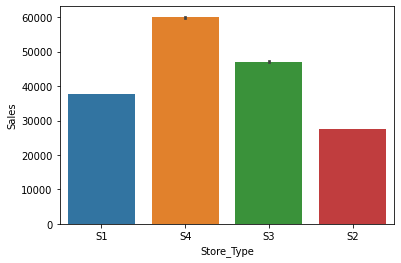

In [16]:
print(Train.Store_Type.value_counts())
values=Train['Store_Type'].value_counts().values
label=['S1','S2','S3','S4']
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')
plt.show()

sns.barplot(x='Store_Type',y='Sales',data=Train)
label=['S1','S2','S3','S4']
plt.show()

* **There are 4 store type {'S1','S2','S3','S4'}.**
* **Store type S4 has highest sales around 47.1% out of all the 4 types of stores.**

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64


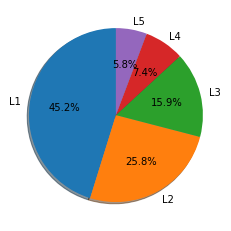

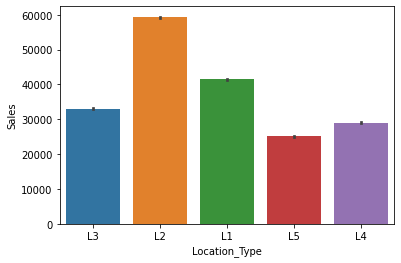

In [17]:
print(Train.Location_Type.value_counts())
values=Train['Location_Type'].value_counts().values
fig,ax1=plt.subplots()
label=['L1','L2','L3','L4','L5']
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')
plt.show()

sns.barplot(x='Location_Type',y='Sales',data=Train)
label=['L1','L2','L3','L4','L5']
plt.show()

* **There are 4 Location type {'L1','L2','L3','L4'}.**
* **Location type L2 has highest sales around 45.2% out of all the 4 types of Location.**

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64


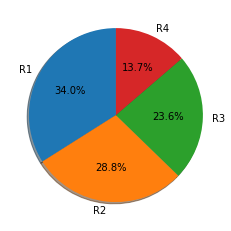

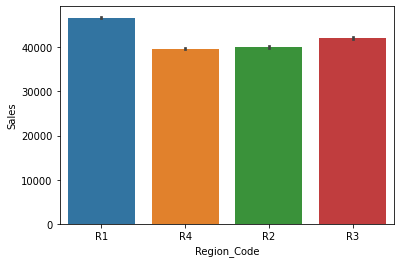

In [18]:
print(Train.Region_Code.value_counts())
values=Train['Region_Code'].value_counts().values
fig,ax1=plt.subplots()
label=['R1','R2','R3','R4']
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')
plt.show()

sns.barplot(x='Region_Code',y='Sales',data=Train)
label=['R1','R2','R3','R4']
plt.show()

* **There are 4 Region code {'R1','R2','R3','R4'}.**
* **All regions almost has equal number of sales.** 

No     104051
Yes     84289
Name: Discount, dtype: int64


[]

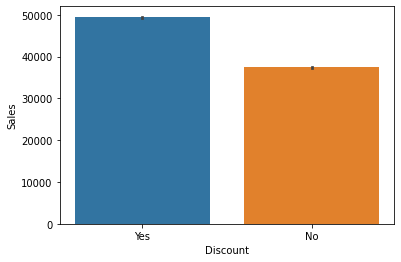

In [19]:
print(Train.Discount.value_counts())
ax = sns.barplot(x=Train.Discount, y=Train.Sales) 
plt.plot()

**Surely Sales increase when there is a discount.**

[]

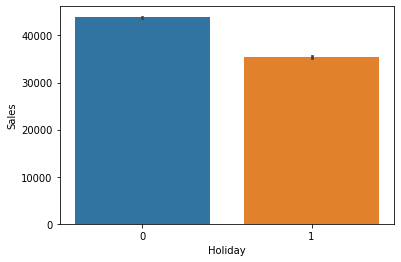

In [20]:
ax = sns.barplot(x=Train.Holiday, y=Train.Sales) 
plt.plot()

**Sales in holidays is lower than in other days.**

<AxesSubplot:xlabel='Store_Type', ylabel='count'>

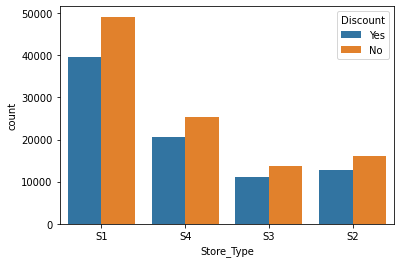

In [21]:
# What store type offers discount.

sns.countplot('Store_Type', hue='Discount', data=Train)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

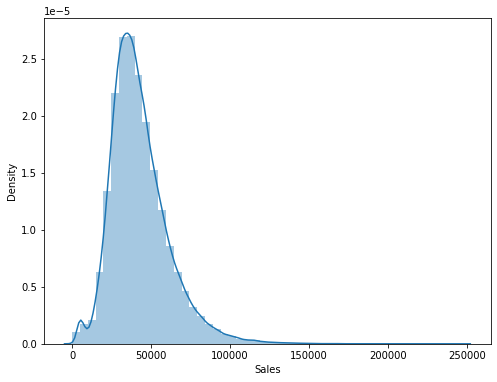

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(Train['Sales'], kde = True)

* **Sales data in Train data is Possitive skewed (Right skewed).**
* **Mostly number of sales is around 40000.**

<AxesSubplot:xlabel='Location_Type', ylabel='Store_Type'>

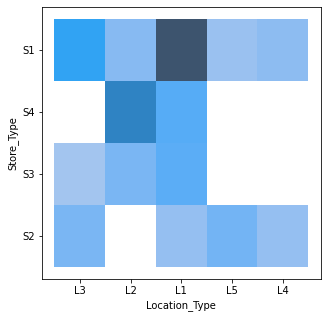

In [23]:
# Visualizing the relation of what type of stores are located in what type of locations.

plt.figure(figsize=(5,5))
sns.histplot(x = Train['Location_Type'], y = Train['Store_Type'], data = Train)

**The above plot clearly shows:**
* **The S1 type of stores are located in all the types of location from L1 to L5.**
* **The L1 contains all types of stores, from S1 to S4.**

### Converting Data type

**Converting the data types of all the 'Categorical variables'  into 'Interger variables'.**

In [24]:
#label Encoding on Train and Test 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder

In [25]:
#Train data
Train['Store_Type']=label_encoder.fit_transform(Train['Store_Type'])
Train['Location_Type']=label_encoder.fit_transform(Train['Location_Type'])
Train['Region_Code']=label_encoder.fit_transform(Train['Region_Code'])
Train['Discount']=label_encoder.fit_transform(Train['Discount'])

In [26]:
# Checking the Train data again after converting the Categorical variables into Numrical variables.
Train.head() 

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,0,2,0,2018-01-01,1,1,9,7011.84
1,T1000002,253,3,1,0,2018-01-01,1,1,60,51789.12
2,T1000003,252,2,1,0,2018-01-01,1,1,42,36868.20
3,T1000004,251,1,2,0,2018-01-01,1,1,23,19715.16
4,T1000005,250,1,2,3,2018-01-01,1,1,62,45614.52


In [27]:
# Checking the data type again after converting the Categorical variables into Numrical variables.
Train.dtypes

ID                object
Store_id           int64
Store_Type         int32
Location_Type      int32
Region_Code        int32
Date              object
Holiday            int64
Discount           int32
#Order             int64
Sales            float64
dtype: object

In [28]:
#Test data
Test['Store_Type']=label_encoder.fit_transform(Test['Store_Type'])
Test['Location_Type']=label_encoder.fit_transform(Test['Location_Type'])
Test['Region_Code']=label_encoder.fit_transform(Test['Region_Code'])
Test['Discount']=label_encoder.fit_transform(Test['Discount'])

In [29]:
# Checking the Test data again after converting the Categorical variables into Numrical variables.
Test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,3,1,2,2019-06-01,0,0
1,T1188342,172,0,0,0,2019-06-01,0,0
2,T1188343,173,3,1,0,2019-06-01,0,0
3,T1188344,174,0,0,3,2019-06-01,0,0
4,T1188345,170,0,0,1,2019-06-01,0,0


In [30]:
# Checking the data type again after converting the Categorical variables into Numrical variables. 
Test.dtypes

ID               object
Store_id          int64
Store_Type        int32
Location_Type     int32
Region_Code       int32
Date             object
Holiday           int64
Discount          int32
dtype: object

### Feature Selection & Extraction

**Date column is in string data type. Thus, converting the data type into datatime and extracting day, month and year in both Train and Test data.**

In [31]:
Train[['Year', 'Month', 'Day']] = Train['Date'].str.split('-', expand=True).astype('float64') 
Test[['Year', 'Month', 'Day']] = Test['Date'].str.split('-', expand=True).astype('float64')

In [32]:
# Checking the Train data set after the exraction of date into day, month and year.
Train.head(3)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day
0,T1000001,1,0,2,0,2018-01-01,1,1,9,7011.84,2018.0,1.0,1.0
1,T1000002,253,3,1,0,2018-01-01,1,1,60,51789.12,2018.0,1.0,1.0
2,T1000003,252,2,1,0,2018-01-01,1,1,42,36868.20,2018.0,1.0,1.0


In [33]:
# Checking the Test data set after the exraction of date into day, month and year.
Test.head(3)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Year,Month,Day
0,T1188341,171,3,1,2,2019-06-01,0,0,2019.0,6.0,1.0
1,T1188342,172,0,0,0,2019-06-01,0,0,2019.0,6.0,1.0
2,T1188343,173,3,1,0,2019-06-01,0,0,2019.0,6.0,1.0


### Reduction of Dimension

- **'ID' : Drop 'ID' column from both the data because it is the unique identifier.**
- **'Date' : Drop 'Date' column from both the data because the date is exracted in three different columns as in day, month and year.**
- **'#Order' : Drop '#Order' column from the Train data because it is not available in Test data and also it is strongly positively correlated with the target variable in Train data.**

In [34]:
# Train data
Train.drop(['ID', 'Date', '#Order'], axis = 1, inplace=True)

# Test Data
Test.drop(['ID', 'Date'], axis = 1, inplace=True)

In [35]:
# Checking the Total count of columns and columns in both the data.

print("Train data Columns :\n", Train.columns, '\n\nTotal count of columns :', Train.shape[1], '\n\n')
print("Test data Columns :\n", Test.columns, '\n\nTotal count of columns :', Test.shape[1])

Train data Columns :
 Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
       'Discount', 'Sales', 'Year', 'Month', 'Day'],
      dtype='object') 

Total count of columns : 10 


Test data Columns :
 Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
       'Discount', 'Year', 'Month', 'Day'],
      dtype='object') 

Total count of columns : 9


* **Train data have total 10 columns including target column (Sales)**.
* **Test data have total 9 columns**.

### Missing Value Analysis

**Checking Missing values in Train and Test data set.**

Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Holiday          0
Discount         0
Sales            0
Year             0
Month            0
Day              0
dtype: int64


<AxesSubplot:>

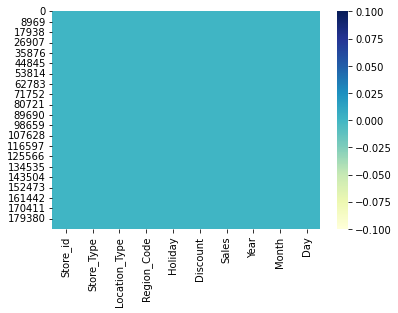

In [36]:
# Train data set
print(Train.isnull().sum())

# Visualizing the same using heatmap.
sns.heatmap(Train.isnull(), cmap = 'YlGnBu')

Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Holiday          0
Discount         0
Year             0
Month            0
Day              0
dtype: int64


<AxesSubplot:>

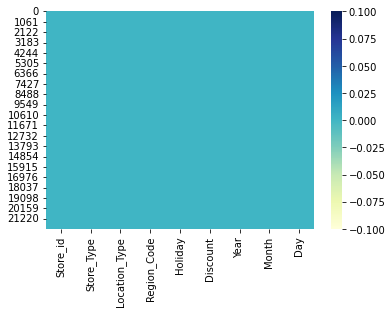

In [37]:
# Test data set
print(Test.isnull().sum())

# Visualizing the same using heatmap.
sns.heatmap(Test.isnull(), cmap = 'YlGnBu')

* **There are no null values present in both the dataset i.e. Train and Test data.**

### Saperating The Input and Output Variables

In [38]:
# Splitting the data into Independent and Dependent variables.

X = Train.drop('Sales', axis=1)
Y = Train['Sales']

In [39]:
# Let's check the Shape of Input and Output variables.

print(X.shape)
print(Y.shape)

(188340, 9)
(188340,)


In [40]:
# Checking the Independent variables.

X.head(3)

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Year,Month,Day
0,1,0,2,0,1,1,2018.0,1.0,1.0
1,253,3,1,0,1,1,2018.0,1.0,1.0
2,252,2,1,0,1,1,2018.0,1.0,1.0


In [41]:
# Checking the Dependent variable.

Y.head()

0     7011.84
1    51789.12
2    36868.20
3    19715.16
4    45614.52
Name: Sales, dtype: float64

### Splitting the Train data

**Splitting the Train data into train and test set, ratio being 75% and 25% respectively.**

In [42]:
# Importing library for split Train data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.25)


### Model Building

 **1)    Linear Regression** 

In [43]:
# Importing the algorithm to be used to build a Linear Regression model.
from sklearn.linear_model import LinearRegression

# Giving an instance to the Linear regression
lR = LinearRegression()

# Training the model
lR.fit(X_train, Y_train)

# Predicting the output
Y_pred = lR.predict(X_test)

In [44]:
from math import sqrt
from sklearn import metrics

#print('MSE:',metrics.mean_squared_error(Y_test,Y_pred))
print('RMSE:',sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('MAE:',metrics.mean_absolute_error(Y_test,Y_pred))
print('r2:',metrics.r2_score(Y_test,Y_pred))

RMSE: 13892.112747354537
MAE: 10049.956457154038
r2: 0.4285411922014011


 **2)    Decision Tree Regressor** 

In [45]:
# Importing the algorithm to be used to build a  Decision Tree Regressor model.
from sklearn.tree import DecisionTreeRegressor   

# Giving an instance to the  Decision Tree Regressor
DTR = DecisionTreeRegressor()

# Training the model
DTR.fit(X_train, Y_train)

# Predicting the output
Y1_pred = DTR.predict(X_test)

In [46]:
from math import sqrt
from sklearn import metrics

#print('MSE:',metrics.mean_squared_error(Y_test,Y1_pred))
print('RMSE:',sqrt(metrics.mean_squared_error(Y_test,Y1_pred)))
print('MAE:',metrics.mean_absolute_error(Y_test,Y1_pred))
print('r2:',metrics.r2_score(Y_test,Y1_pred))

RMSE: 11502.959057632082
MAE: 7778.038714240204
r2: 0.6081972498037873


 **3)    Random Forest Regressor** 

In [47]:
# Importing the algorithm to be used to build a  Random Forest Regressor model.
from sklearn.ensemble import RandomForestRegressor 

# Giving an instance to the  Random Forest Regressor
RFR = RandomForestRegressor()

# Training the model
RFR.fit(X_train, Y_train)

# Predicting the output
Y2_pred = RFR.predict(X_test)

In [48]:
from math import sqrt
from sklearn import metrics

#print('MSE:',metrics.mean_squared_error(Y_test,Y2_pred))
print('RMSE:',sqrt(metrics.mean_squared_error(Y_test,Y2_pred)))
print('MAE:',metrics.mean_absolute_error(Y_test,Y2_pred))
print('r2:',metrics.r2_score(Y_test,Y2_pred))

RMSE: 8827.024298142038
MAE: 6032.060748129978
r2: 0.7692843917136465


**4) XGBoost Regression Model**

In [49]:
# Importing the algorithm to be used to build a  XGBoost Regression Model.
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor

# Giving an instance to the  XGBR Regressor
XGBR = XGBRegressor()

# Training the model
XGBR.fit(X_train, Y_train)

# Predicting the output
Y3_pred = XGBR.predict(X_test)

In [61]:
from math import sqrt
from sklearn import metrics

#print('MSE:',metrics.mean_squared_error(Y_test,Y3_pred))
print('RMSE:',sqrt(metrics.mean_squared_error(Y_test,Y3_pred)))
print('MAE:',metrics.mean_absolute_error(Y_test,Y3_pred))
print('r2:',metrics.r2_score(Y_test,Y3_pred))

RMSE: 7883.251053679681
MAE: 5525.506371896838
r2: 0.8159825335038038


- **We have build four models (Linear Regression, Decision Tree Regressor,  Random Forest Regressor, XGBoost Regression Model).**
- **We have checked the error in each of this model.**
- **We have notice that XGBoost Regression Model has less error compare to the other model.**
- **We have fixed XGBoost Regression Model (XGBR).** 

### Making the Final predictions

**Now we will predict 'Sales' for Test data using XGBoost Regression Model (XGBR).**

In [51]:
Final_predictions = XGBR.predict(Test)

In [52]:
Final_predictions 

array([ 95519.914,  51695.82 , 108060.44 , ...,  44347.125,  28792.668,
        24859.871], dtype=float32)

### Load SAMPLE Data

In [53]:
data = pd.read_csv(r'C:\Users\Bharti Lenday\Downloads\SAMPLE.csv')

In [54]:
data.head()

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


In [55]:
#drop 'Sales' column
data.drop(columns =['Sales'],inplace =True)

In [56]:
# Add new column 'Sales' equal to Final_predictions 
data['Sales'] = Final_predictions 

In [57]:
# Check data
data.head()

,ID,Sales
0,T1188341,95519.914062
1,T1188342,51695.820312
2,T1188343,108060.437500
3,T1188344,57479.257812
4,T1188345,54386.652344


**Saving the Final predictions in a csv.**

In [58]:
data.to_csv('my_submission.csv', index=False)